In [ ]:
!pip install tensorflow numpy matplotlib seaborn --quiet

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0, 25, 25]

0

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', '	Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

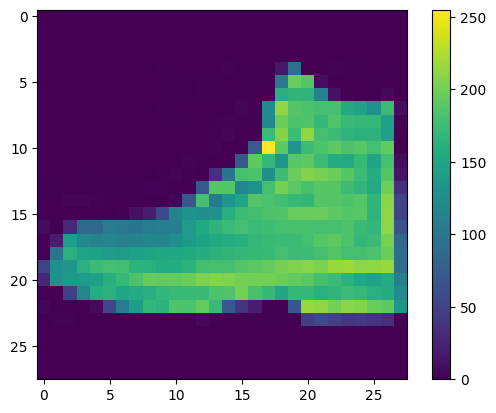

In [ ]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

1. input layer
2. hidden layer
3. output layer


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4983 - accuracy: 0.8245
Epoch 2/2
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3738 - accuracy: 0.8648


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('test accuracy : ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3924 - accuracy: 0.8588
test accuracy :  0.8587999939918518


In [ ]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions

array([[4.9529666e-05, 6.2741128e-07, 4.3268888e-06, ..., 1.1996334e-01,
        7.1426423e-04, 8.6734837e-01],
       [5.4634787e-05, 1.0916187e-07, 9.6174157e-01, ..., 2.7043649e-11,
        1.5222505e-05, 1.0451233e-09],
       [2.2220818e-06, 9.9997801e-01, 2.3256634e-06, ..., 5.2830580e-09,
        2.2448587e-07, 8.6525304e-10],
       ...,
       [4.4086663e-04, 1.4217538e-07, 1.0898892e-04, ..., 9.7436177e-06,
        9.9820143e-01, 2.0044837e-07],
       [2.7688743e-06, 9.9785817e-01, 1.1787208e-05, ..., 1.9080501e-07,
        1.4807957e-06, 3.3449744e-06],
       [8.6712965e-04, 1.3872472e-04, 1.3056389e-03, ..., 7.4322350e-02,
        2.5118476e-02, 3.6168050e-03]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

Pick a number: 279
1/1 [==============================] - 0s 30ms/step


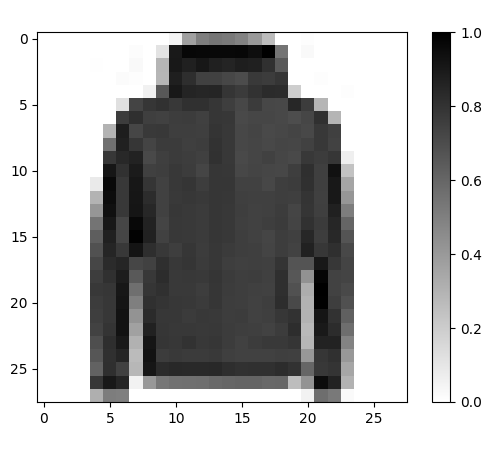

image is : Coat, guessed : Coat


In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print('image is : {}, guessed : {}'.format(label, guess))


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
